In [43]:
import random
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline

In [180]:
data_folder = "/Users/miaoyuesun/Code_Workspace/brad_public_workspace_mac/data/CH_database/"
data = pd.read_csv(data_folder+"sh000001.csv")

# 目录

1. 第十四章 - 随机变量简介
2. 第十五章 - 推断统计
3. 第十六章 - 方差分析
4. 第十七章 - 多元线性回归模型

# 第十四章 - 随机变量简介
- np.random.binomial() 二项式分布 binomial distribution - 离散型分布
- stats.kde.gaussian_kde() 高斯核概率分布
- stats.norm.ppf() 正态分布/高斯分布/Normal Distribution/Gaussian Distribution/钟形曲线）应用:VaR - 连续形分布
- 卡方分布
- t分布
- F分布

In [8]:
from scipy import stats

## stats.kde.gaussian_kde() 高斯核概率分布

In [181]:
data['returns'] = data['close'].pct_change()
data.dropna(inplace=True)

In [183]:
data.reset_index(inplace = True)
del data['index']

In [184]:
data

,trade_date,open,high,low,close,volume,ts_code,returns
0,1990-12-21,109.0700,109.1300,103.7300,109.1300,28.0,sh000001,0.045407
1,1990-12-24,113.5700,114.5500,109.1300,114.5500,32.0,sh000001,0.049666
2,1990-12-25,120.0900,120.2500,114.5500,120.2500,15.0,sh000001,0.049760
3,1990-12-26,125.2700,125.2700,120.2500,125.2700,100.0,sh000001,0.041746
4,1990-12-27,125.2700,125.2800,125.2700,125.2800,66.0,sh000001,0.000080
...,...,...,...,...,...,...,...,...
7109,2020-01-17,3081.4641,3091.9516,3067.2525,3075.4955,190304299.0,sh000001,0.000460
7110,2020-01-20,3082.1134,3096.3105,3070.4801,3095.7873,210493341.0,sh000001,0.006598
7111,2020-01-21,3085.7895,3085.7895,3051.2301,3052.1419,234830739.0,sh000001,-0.014098
7112,2020-01-22,3038.4868,3069.2527,3006.2677,3060.7545,223852865.0,sh000001,0.002822


In [188]:
data.index = data['trade_date']

In [189]:
density=stats.kde.gaussian_kde(data['returns']) 
bins = np.arange(-0.1,0.1,0.0002)

Text(0.5, 1.0, 'PDF on Shanghai Composite Index Daily Returns')

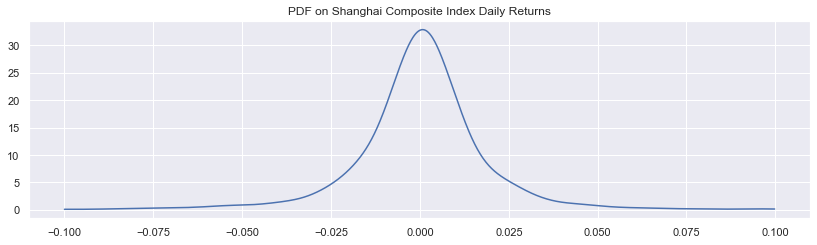

In [190]:
plt.figure(figsize=(14,8))
plt.subplot(211)
plt.plot(bins, density(bins))
plt.title('PDF on Shanghai Composite Index Daily Returns')

Text(0.5, 1.0, 'PDF on Shanghai Composite Index Cumulative Daily Returns')

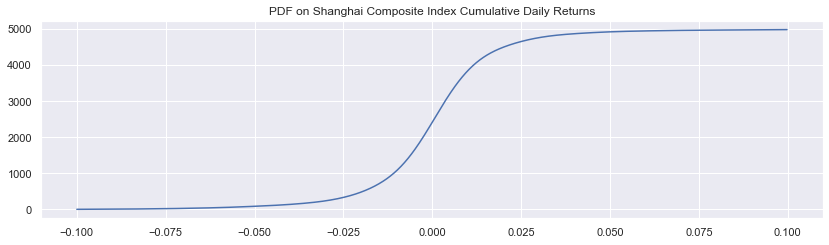

In [191]:
plt.figure(figsize=(14,8))
plt.subplot(211)
plt.plot(bins, density(bins).cumsum())
plt.title('PDF on Shanghai Composite Index Cumulative Daily Returns')

## 正态分布 stats.norm.ppf() 应用在VaR上

In [192]:
returns = data['returns']
returns_means = returns.mean()
returns_variance = returns.var()

In [193]:
print(returns_means)
print(returns_variance)

0.0007393614556032737
0.0006076815341998795


In [194]:
# 查询累积密度值为0.05的分位数
stats.norm.ppf(0.05,returns_means, returns_variance**0.5) #有95%的概率日损失不会超过3.98%

-0.03980825002804818

## 二项分布的应用

In [195]:
# The pct of days that are up
p = len(returns[returns>0])/len(returns)
p

0.5272701714928311

In [196]:
# 十个交易日中有6个交易日上涨的概率
prob = stats.binom.pmf(6,10,p)
prob

0.22535673421919755

## 相关性分析 - 000001和上证指数

In [197]:
data1 = pd.read_csv(data_folder+"000001.SZ.csv")

In [198]:
data1

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,000001.SZ,2010-01-04,8.0647,8.0844,7.7884,7.7983,8.0154,-0.2171,-2.7085,241922.76,5.802495e+05
1,000001.SZ,2010-01-05,7.8114,7.8608,7.4825,7.6634,7.7983,-0.1349,-1.7299,556499.82,1.293477e+06
2,000001.SZ,2010-01-06,7.6470,7.6470,7.4727,7.5319,7.6634,-0.1315,-1.7159,412143.13,9.444537e+05
3,000001.SZ,2010-01-07,7.5319,7.5812,7.3674,7.4497,7.5319,-0.0822,-1.0914,355336.85,8.041663e+05
4,000001.SZ,2010-01-08,7.4003,7.4825,7.3510,7.4332,7.4497,-0.0165,-0.2215,288543.06,6.506674e+05
...,...,...,...,...,...,...,...,...,...,...,...
2370,000001.SZ,2020-01-15,16.7900,16.8600,16.4500,16.5200,16.7600,-0.2400,-1.4320,859439.12,1.424889e+06
2371,000001.SZ,2020-01-16,16.5200,16.5700,16.2000,16.3300,16.5200,-0.1900,-1.1501,1028104.67,1.678889e+06
2372,000001.SZ,2020-01-17,16.3800,16.5500,16.3500,16.3900,16.3300,0.0600,0.3674,605436.69,9.959090e+05
2373,000001.SZ,2020-01-20,16.4300,16.6100,16.3500,16.4500,16.3900,0.0600,0.3661,746074.75,1.226465e+06


In [199]:
data1.index = data1['trade_date']

In [200]:
data1

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
trade_date,,,,,,,,,,,
2010-01-04,000001.SZ,2010-01-04,8.0647,8.0844,7.7884,7.7983,8.0154,-0.2171,-2.7085,241922.76,5.802495e+05
2010-01-05,000001.SZ,2010-01-05,7.8114,7.8608,7.4825,7.6634,7.7983,-0.1349,-1.7299,556499.82,1.293477e+06
2010-01-06,000001.SZ,2010-01-06,7.6470,7.6470,7.4727,7.5319,7.6634,-0.1315,-1.7159,412143.13,9.444537e+05
2010-01-07,000001.SZ,2010-01-07,7.5319,7.5812,7.3674,7.4497,7.5319,-0.0822,-1.0914,355336.85,8.041663e+05
2010-01-08,000001.SZ,2010-01-08,7.4003,7.4825,7.3510,7.4332,7.4497,-0.0165,-0.2215,288543.06,6.506674e+05
...,...,...,...,...,...,...,...,...,...,...,...
2020-01-15,000001.SZ,2020-01-15,16.7900,16.8600,16.4500,16.5200,16.7600,-0.2400,-1.4320,859439.12,1.424889e+06
2020-01-16,000001.SZ,2020-01-16,16.5200,16.5700,16.2000,16.3300,16.5200,-0.1900,-1.1501,1028104.67,1.678889e+06
2020-01-17,000001.SZ,2020-01-17,16.3800,16.5500,16.3500,16.3900,16.3300,0.0600,0.3674,605436.69,9.959090e+05


In [201]:
returns1 = data1['pct_chg']/100
returns0 = returns[returns1.index]

In [202]:
returns0

trade_date
2010-01-04   -0.010185
2010-01-05    0.011844
2010-01-06   -0.008520
2010-01-07   -0.018880
2010-01-08    0.001009
                ...   
2020-01-15   -0.005402
2020-01-16   -0.005164
2020-01-17    0.000460
2020-01-20    0.006598
2020-01-21   -0.014098
Name: returns, Length: 2375, dtype: float64

In [203]:
returns1

trade_date
2010-01-04   -0.027085
2010-01-05   -0.017299
2010-01-06   -0.017159
2010-01-07   -0.010914
2010-01-08   -0.002215
                ...   
2020-01-15   -0.014320
2020-01-16   -0.011501
2020-01-17    0.003674
2020-01-20    0.003661
2020-01-21   -0.027356
Name: pct_chg, Length: 2375, dtype: float64

Text(0.5, 1.0, 'Scatter Plot on Relationship of Two Returns')

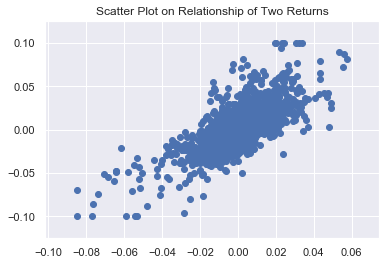

In [204]:
plt.scatter(returns0, returns1)
plt.title("Scatter Plot on Relationship of Two Returns")

In [205]:
returns0.corr(returns1)

0.713457389250428

# 第十五章 - 推断统计

- Parameter Estimation 参数估计：均值、标准差
- Hypothesis Testing 假设检验

## 参数估计

In [219]:
returns0_mean = returns0.mean()
returns0_stddev = returns0.std()

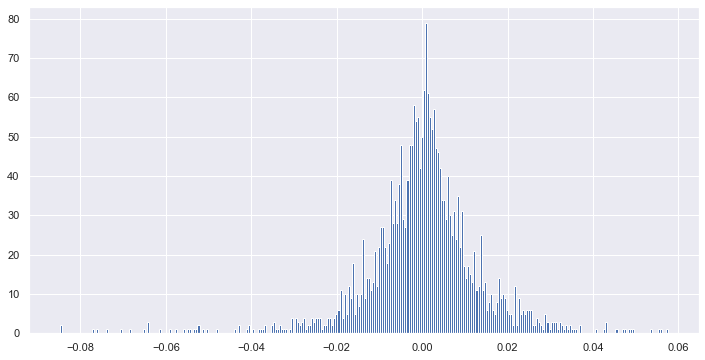

In [208]:
# 先从图像的角度看一下服从什么概率分布：
returns0.hist(bins = 300, figsize=(12,6))

In [209]:
returns0.max()

0.05763528201478563

In [210]:
returns0.min()

-0.08490898993769214

In [211]:
returns0[returns0==returns0.max()]

trade_date
2015-07-09    0.057635
Name: returns, dtype: float64

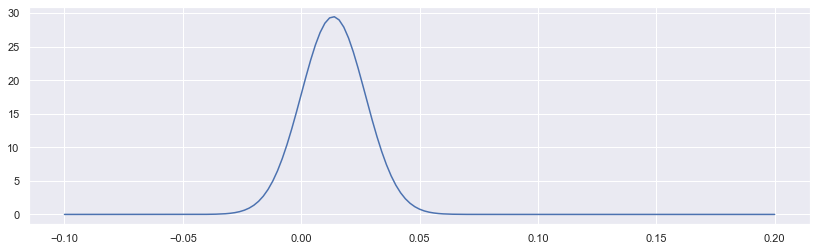

In [212]:
plt.figure(figsize=(14,4))
# plt.hist(returns)
plt.plot(np.arange(-0.1, 0.2, 0.002),\
        stats.norm.pdf(np.arange(-0.1, 0.2, 0.002),\
                      returns0_mean, returns0_stddev))

In [213]:
# 进行区间估计
stats.t.interval(0.95, len(returns0)-1,\
                returns0_mean, stats.sem(returns0))

(0.012986838592049499, 0.014075788005755626)

根据估计的结果，可以得出在置信区间为0.95时，上证指数收益率的置信区间为(0.012986838592049499, 0.014075788005755626)

## 假设检验

### p检验
- 

重点在于检验参数的取值是否等于某个目标值。

假设检验一般具有两个隐含的思想：

- 小概率事件思想：小概率事件在只有一次试验的情况下，几乎是不可能发生的。如果在我们的假设下，出现了一个小概率事件，那么假设即错误
- 反证法思想：先假设我们的假设是正确的，然后在该条件下检验观测到的事件是不是小概率事件。如果是，那么就可以否定我们的假设；否则，我们就无法否定。

- p检验：我们把所得到的样本或更极端的情况出现的概率叫做p值。
总的来说，在假设检验中，判断小概率时间的一个基本原则是：当p值小于alpha时，我们的样本为小概率事件。而对于p值和alpha的比较，可以采取两种方法：


- 1. 临界值检验法（Critical Value Approach）
- 2. 显著性检验法（p-value Approach）

### t 检验

t检验所使用的统计量服从t分布，常用于检验标准差stddev未知的、服从正态分布总体的均值。

#### 例1：使用单样本t检验检验上证综指收益率均值是否为0:

In [214]:
# 输入我们要检验的变量以及药比较的数值即可。
# 这里，原假设为上证综指的收益率均值为0，而p=0.94>0.05，所以在5%的显著水平下，不能拒绝原假设（原假设为：0是均值；p大于0.05表示不能拒绝原假设），
# 因此推断上证综指的收益率均值为0
stats.ttest_1samp(returns0, 0)

Ttest_1sampResult(statistic=0.07326519342193298, pvalue=0.9416012609685901)

#### 例2: 使用独立样本t检验来检验上证综指和000001的收益率均值是否相等

In [151]:
# 原假设为相等，p>0.05，不能拒绝原假设，所以在5%的significant level的水平下，我们不能拒绝原假设，既不能拒绝“相等”，
# 因此推断两者收益率均值相等
stats.ttest_ind(returns0, returns1)

Ttest_indResult(statistic=1.4829085301961764, pvalue=0.13816509858515152)

#### 例3: 但是独立样本t检验假设两者是相互独立的。对于上证综指的收益率和000001的收益率，这个假设是很值得怀疑的。因此，我们使用配对样本t检验再次检验两者的均值是否相等

In [222]:
# 原假设为两者收益率均值相等，p大于0.05，因此在5%的显著水平下，不能拒绝原假设（收益率相等），因此推断两者收益率均值相等
stats.ttest_rel(returns0, returns1)

Ttest_relResult(statistic=-1.6127953519473044, pvalue=0.10692188970737095)

# 第十六章 - 方差分析

## 单因素方差分析

### 应用：可应用在比较不同行业的收益率是否一样 Page227

In [231]:
code = ['000001','000002','000003','000004','000005']
years = ['2014','2014','2014','2014','2014']
ind_returns = [0.57298,0.827567,0.336481,0.64,0.477997]
industries = ['货币金融服务','房地产业','医药制造业','房地产业','房地产业']

In [234]:
industry_returns = pd.DataFrame()
industry_returns['Code'] = code
industry_returns['Year'] = years
industry_returns['Return'] = ind_returns
industry_returns['Industry'] = industries

In [235]:
industry_returns

,Code,Year,Return,Industry
0,000001,2014,0.572980,货币金融服务
1,000002,2014,0.827567,房地产业
2,000003,2014,0.336481,医药制造业
3,000004,2014,0.640000,房地产业
4,000005,2014,0.477997,房地产业


In [238]:
import statsmodels.stats.anova as anova
from statsmodels.formula.api import ols

In [242]:
model = ols('Return ~ C(Industry)',\
           data=industry_returns.dropna()).fit()

In [244]:
# p-value主要看PR(>F)的值

table1 = anova.anova_lm(model)
print(table1)

              df    sum_sq   mean_sq         F    PR(>F)
C(Industry)  2.0  0.073032  0.036516  1.193163  0.455962
Residual     2.0  0.061209  0.030604       NaN       NaN


# 第十七章 - 回归分析

## 一元线性回归

例1: 两种资产收益率数据构造一元回归模型

### 1. summary report

In [245]:
import statsmodels.api as sm
model = sm.OLS(returns0, sm.add_constant(returns1)).fit()

/Users/miaoyuesun/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [247]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                returns   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     2460.
Date:                Tue, 28 Jan 2020   Prob (F-statistic):               0.00
Time:                        13:24:58   Log-Likelihood:                 7694.3
No. Observations:                2375   AIC:                        -1.538e+04
Df Residuals:                    2373   BIC:                        -1.537e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002      0.000     -1.100      0.272      -0.001       0.000
pct_chg        0.4554      0.009     49.600      0.000       0.437       0.473
==============================================================================
Omnibus:                      354.034   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1321.049
Skew:                          -0.703   Prob(JB):                    1.37e-287
Kurtosis:                       6.372   Cond. No.                         47.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Thus, the linear relationship between returns0 and returns1 is:

returns0 = -0.0002+0.4554*returns1+error

### 2. Plot graph to diagnose

#### 2.1 线性：若因变量与自变量线性相关，残差值应该和拟合值没有任何的系统关联，呈现出围绕着0随机分布的状态。从下图来看，这一嘉定基本上满足

Text(0, 0.5, 'residuals')

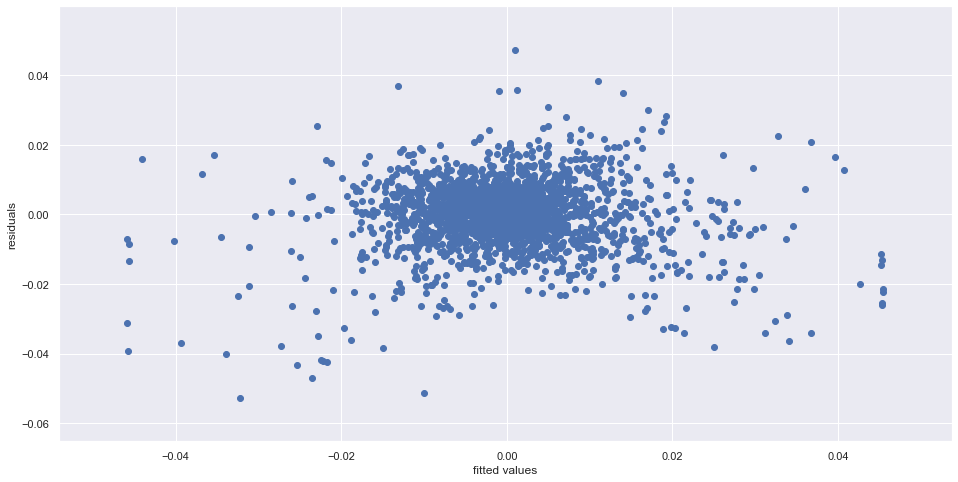

In [250]:
plt.figure(figsize=(16,8))
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel('fitted values')
plt.ylabel('residuals')

#### 2.2 正态性：当因变量呈正态分布时，模型的残差项应该是一个均值为0的正态分布。
然而，残差如图在两端出现了严重的偏离，因此，数据肯能并不满足正态性的假设。


问题：为何会有两张图？

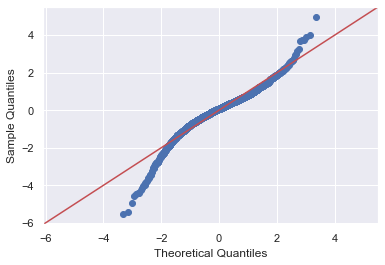

<Figure size 1152x576 with 0 Axes>

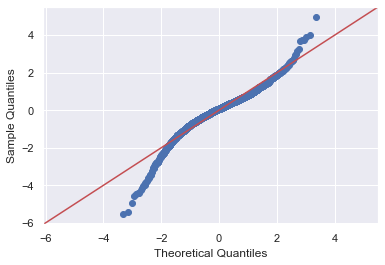

In [260]:
plt.figure(figsize=(16,8))
sm.qqplot(model.resid_pearson,\
         stats.norm,line='45')

#### 2.3 同方差性：若满足不变方差假定，那么在位置尺度图(Scale Location Plot)上，各点分布应该呈现出一条水平的、宽度一致的条带形状。



/Users/miaoyuesun/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'square root of standardized residuals')

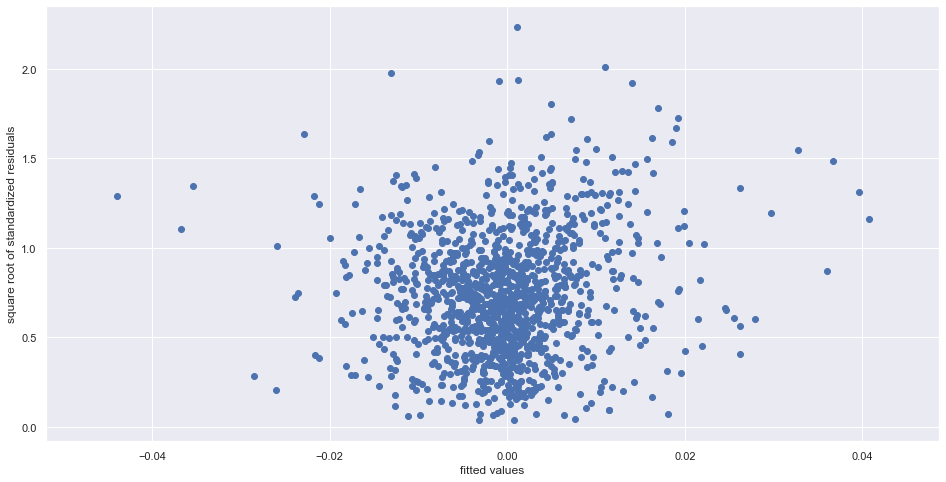

In [262]:
plt.figure(figsize=(16,8))
plt.scatter(model.fittedvalues,\
           model.resid_pearson**0.5)
plt.xlabel('fitted values');
plt.ylabel('square root of standardized residuals')

## 多元线性回归

### 检测每一个feature的显著性

In [278]:
data_multilinear = data.iloc[:, 1:].copy()

In [281]:
data_multilinear.head()

,open,high,low,close,volume,ts_code,returns
trade_date,,,,,,,
1990-12-21,109.07,109.13,103.73,109.13,28.0,sh000001,0.045407
1990-12-24,113.57,114.55,109.13,114.55,32.0,sh000001,0.049666
1990-12-25,120.09,120.25,114.55,120.25,15.0,sh000001,0.049760
1990-12-26,125.27,125.27,120.25,125.27,100.0,sh000001,0.041746
1990-12-27,125.27,125.28,125.27,125.28,66.0,sh000001,0.000080


In [296]:
model_mul = sm.OLS(data_multilinear['returns'],
                   sm.add_constant(data_multilinear.iloc[:, :5])).fit()

/Users/miaoyuesun/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [297]:
model_mul.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                returns   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     1088.
Date:                Tue, 28 Jan 2020   Prob (F-statistic):               0.00
Time:                        18:16:26   Log-Likelihood:                 18271.
No. Observations:                7114   AIC:                        -3.653e+04
Df Residuals:                    7108   BIC:                        -3.649e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0026      0.000      5.405      0.000       0.002       0.004
open       -7.092e-05   1.53e-05     -4.650      0.000      -0.000    -4.1e-05
high          -0.0003   1.64e-05    -16.641      0.000      -0.000      -0.000
low           -0.0004   1.29e-05    -30.425      0.000      -0.000      -0.000
close          0.0007   1.37e-05     53.532      0.000       0.001       0.001
volume      -3.48e-12   2.92e-12     -1.191      0.234   -9.21e-12    2.25e-12
==============================================================================
Omnibus:                    13078.950   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         88642023.722
Skew:                          12.936   Prob(JB):                         0.00
Kurtosis:                     549.238   Cond. No.                     2.85e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.85e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

数据显示，volume不显著

### 检测feature之间的共线性

In [300]:
# 有很强的共线性，因此不能反映真实情况。正确做法应该是剔除和其他变量相关性很高的系数
data_multilinear.iloc[:, :5].corr()

,open,high,low,close,volume
open,1.000000,0.999778,0.999644,0.999439,0.686221
high,0.999778,1.000000,0.999489,0.999697,0.688453
low,0.999644,0.999489,1.000000,0.999671,0.685594
close,0.999439,0.999697,0.999671,1.000000,0.687752
volume,0.686221,0.688453,0.685594,0.687752,1.000000


# 第十八章 - 资产收益率和风险

## 1. 简单收益率

In [301]:
simpleret = returns0.copy()

In [304]:
simpleret

trade_date
2010-01-04   -0.010185
2010-01-05    0.011844
2010-01-06   -0.008520
2010-01-07   -0.018880
2010-01-08    0.001009
                ...   
2020-01-15   -0.005402
2020-01-16   -0.005164
2020-01-17    0.000460
2020-01-20    0.006598
2020-01-21   -0.014098
Name: returns, Length: 2375, dtype: float64

In [306]:
returns0

trade_date
2010-01-04   -0.010185
2010-01-05    0.011844
2010-01-06   -0.008520
2010-01-07   -0.018880
2010-01-08    0.001009
                ...   
2020-01-15   -0.005402
2020-01-16   -0.005164
2020-01-17    0.000460
2020-01-20    0.006598
2020-01-21   -0.014098
Name: returns, Length: 2375, dtype: float64

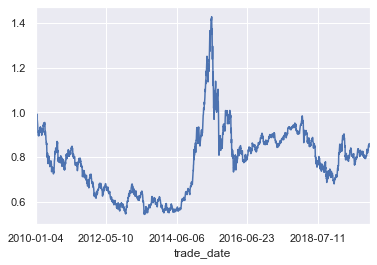

In [307]:
(1+simpleret).cumprod().plot()

In [308]:
(1+simpleret).cumprod()[-1]**(252/len(simpleret))-1

-0.017954407355740942

In [ ]:
annualize = (1+simpleret).cumprod()[-1]

In [309]:
# 专门编写一个计算年化收益率的函数，该函数可以针对不同的单期计算年化收益率：

def annualize(returns, period):
    if period=='day':
        return ((1+returns).cumprod()[-1]**(252/len(returns))-1)
    if period=='month':
        return ((1+returns).cumprod()[-1]**(12/len(returns))-1)
    if period=='quarter':
        return ((1+returns).cumprod()[-1]**(4/len(returns))-1)
    if period=='year':
        return ((1+returns).cumprod()[-1]**(1/len(returns))-1)
    else:
        raise Exception("Wrong period.")

In [312]:
annualize(returns0, 'day')

-0.017954407355740942

## 2. 计算单期连续复利收益率（Continuous Compounding）

### 方法一：

In [315]:
close0 = data['close'].copy()

In [316]:
close0

trade_date
1990-12-21     109.1300
1990-12-24     114.5500
1990-12-25     120.2500
1990-12-26     125.2700
1990-12-27     125.2800
                ...    
2020-01-17    3075.4955
2020-01-20    3095.7873
2020-01-21    3052.1419
2020-01-22    3060.7545
2020-01-23    2976.5281
Name: close, Length: 7114, dtype: float64

In [323]:
lagclose0 = close0.shift(1)

In [325]:
# compound returns:
np.log(close0/lagclose0)

trade_date
1990-12-21         NaN
1990-12-24    0.048472
1990-12-25    0.048562
1990-12-26    0.040898
1990-12-27    0.000080
                ...   
2020-01-17    0.000460
2020-01-20    0.006576
2020-01-21   -0.014199
2020-01-22    0.002818
2020-01-23   -0.027904
Name: close, Length: 7114, dtype: float64

### 方法二：

In [318]:
import ffn

In [319]:
compound_ret = ffn.to_log_returns(close0)

In [320]:
# compound returns:
compound_ret

trade_date
1990-12-21         NaN
1990-12-24    0.048472
1990-12-25    0.048562
1990-12-26    0.040898
1990-12-27    0.000080
                ...   
2020-01-17    0.000460
2020-01-20    0.006576
2020-01-21   -0.014199
2020-01-22    0.002818
2020-01-23   -0.027904
Name: close, Length: 7114, dtype: float64

In [322]:
returns0

trade_date
2010-01-04   -0.010185
2010-01-05    0.011844
2010-01-06   -0.008520
2010-01-07   -0.018880
2010-01-08    0.001009
                ...   
2020-01-15   -0.005402
2020-01-16   -0.005164
2020-01-17    0.000460
2020-01-20    0.006598
2020-01-21   -0.014098
Name: returns, Length: 2375, dtype: float64

## 多期连续复利收益率

In [326]:
compound_ret2 = np.log(close0/close0.shift(2))

In [327]:
# 2期连续复利收益率等于前一天和当天的单期复利收益率之和。单期加总即得多期

# 从Page 264开始

In [331]:
returns0['2020-01-15':'2020-01-20']

trade_date
2020-01-15   -0.005402
2020-01-16   -0.005164
2020-01-17    0.000460
2020-01-20    0.006598
Name: returns, dtype: float64